# Overly Correlated Columns

For the final step in the EDA, I will drop any overly correlated columns.

The first step is to once again compute the correlation matrix as we saw before:

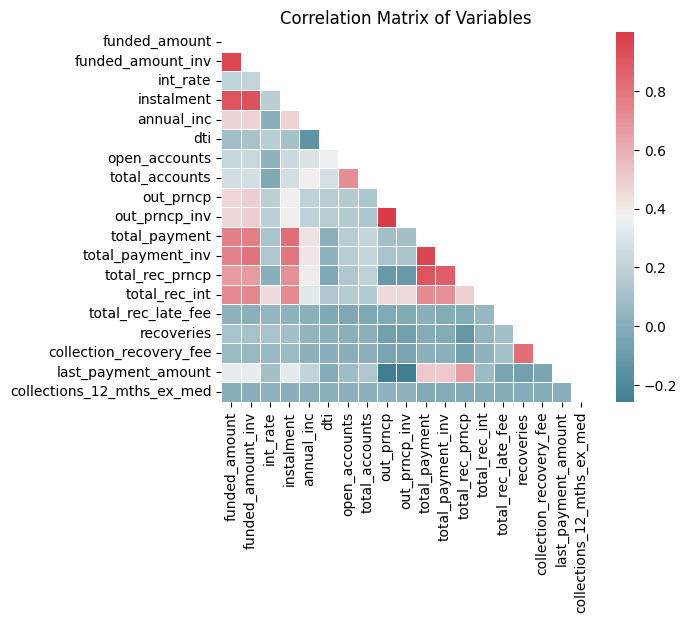

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('unskewed_data.csv')

# Select only columns with float data types
int_columns = df.select_dtypes(include='float').columns
df_int = df[int_columns]

# Compute correlation matrix
corr = df_int.corr()

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask,
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Variables')
plt.show()

As good as simply visualizing the correlation matrix is, let's set a threshold of say 0.7 to explicitly see what columns we want to look at:

In [6]:
# Get the upper triangle of the correlation matrix
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Extract correlations above 0.6
high_corr_values = upper_triangle[upper_triangle > 0.7].stack().sort_values(ascending=False)

# Display the list of largest correlations above 0.6
print("Largest Correlations above 0.7:")
print(high_corr_values)

Largest Correlations above 0.7:
out_prncp          out_prncp_inv              0.999995
total_payment      total_payment_inv          0.962217
funded_amount      funded_amount_inv          0.953524
funded_amount_inv  instalment                 0.916596
funded_amount      instalment                 0.909393
total_payment      total_rec_prncp            0.909119
total_payment_inv  total_rec_prncp            0.881818
instalment         total_payment              0.818734
recoveries         collection_recovery_fee    0.814260
funded_amount_inv  total_payment_inv          0.799015
instalment         total_payment_inv          0.794234
funded_amount_inv  total_payment              0.766775
funded_amount      total_payment              0.761598
                   total_payment_inv          0.749754
funded_amount_inv  total_rec_int              0.734659
funded_amount      total_rec_int              0.724715
instalment         total_rec_int              0.723680
total_payment      total_rec_int 

With the visualization and clear values, we can now make a list of what the overly correlated columns are:

- out_prncp & out_prncp_inv

Perhaps not surprisingly, the outstanding principal for both the total amount funded, and amount funded by investors are almost identical columns. Let's drop out_prncp_inv here. 

- total_payment & total_payment_inv
- funded_amount & funded_amount_inv

For the same reasons as above, the latter column in both cases will be dropped.

- instalment

This column is very highly correlated with a few columns, namely total_rec_int, total_rec_prncp, and funded_amount. 

- total_rec_prncp

This column is also very highly correlated with the total_payment column, so we are safe to drop this too.

Let's drop these columns and calculate the new correlation matrix:

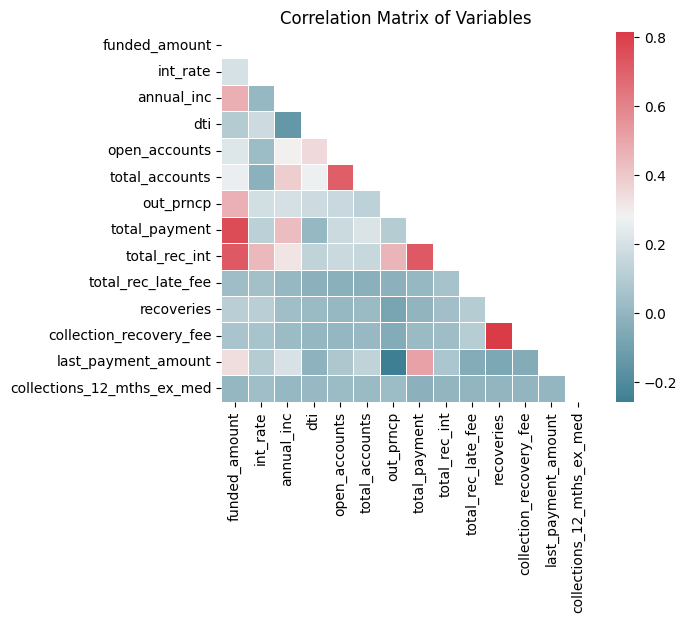

In [7]:
from data_imputer import DataFrameTransform

dropper = DataFrameTransform(df)
dropper.drop_columns(['out_prncp_inv', 'total_payment_inv', 'funded_amount_inv', 'instalment', 'total_rec_prncp'])

df = dropper.data
# Select only columns with float data types
int_columns = df.select_dtypes(include='float').columns
df_int = df[int_columns]

# Compute correlation matrix
corr = df_int.corr()

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask,
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Variables')
plt.show()


recoveries and collection_recovery_fee are highly correlated, and we are likely safe to drop one of the columns as these relate to the gross recovery fee, so let's drop the collection_recovery_fee. 

The last two columns of interest are the total_amounts and open_amounts column. Naturally, the number of open accounts and total accounts will be similar, and look at the correlation matrix they do have similar amounts of correlation with other columns. But are they overly correlated? And will this dataset be better off excluding one of them? My impression is no, as despite being related to a similar object, the account, knowing the total number of accounts won't help you know how many open accounts there are, and vice-versa. 

funded_amount has a high correlation with the total_payment, and total_rec_int. Dropping any of these columns will not be of use however, as they tell us very different things. 

Let's drop the final column:

In [8]:
dropper.drop_columns(['collection_recovery_fee'])

df = dropper.data

This completes the dropping of overly correlated columns, and is the end of Milestone 3!